In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
train='https://ndownloader.figshare.com/files/25244999' #binary
train='https://ndownloader.figshare.com/files/25328735' #continous
df=pd.read_csv(train,index_col=0)
print(df.shape)
df.head(5)

/home/mahdi_moqri/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(473864, 37)


,AddressA_ID,AlleleA_ProbeSeq,AddressB_ID,AlleleB_ProbeSeq,Infinium_Design_Type,Next_Base,Color_Channel,Forward_Sequence,Genome_Build,CHR,...,HMM_Island,Regulatory_Feature_Name,Regulatory_Feature_Group,DHS,seq,CG,TG,CA,mutation,Beta
Name,,,,,,,,,,,,,,,,,,,,,
cg00000165,12637463,CAAAATCTATTAATACAATAACTTTTAATAAAACAACTAAAACACA...,NaN,NaN,II,NaN,NaN,CTAAGTGCAGTCAGGATCTGTTAGTACAGTGGCTTTTGATGGAACA...,37.0,1,...,1:90967262-90967361,NaN,NaN,NaN,TGGCACTAATGAGCCTTGCAAAATGCAACTGTGAATAATGAAAGAC...,33,63,63,1.909091,0.092336
cg00000363,16661505,RTCTTAACTTAACTTAATTTTCTCCTTAATCTAAAAAACTTTCCCT...,NaN,NaN,II,NaN,NaN,CTGCCCAATCGGTCCCTTCCTTCACTCCTCCCCATTCTTAACAAGA...,37.0,1,...,1:228627033-228629325,NaN,NaN,NaN,TTGACCTAGCACAAGTTCTCTATTTCGCCCTGAGACACGCAGAGAC...,44,55,55,1.250000,0.092733
cg00000957,65648367,ATACTACTAACCCATACCCAACAAAACAAAAAACCCCAAAACATCA...,36743439.0,ATACTACTAACCCATACCCGACAAAACAAAAAACCCCAAAACGTCA...,I,C,Grn,TCCTGCAGGCGCACAGACCTCATCCGCTCCAGCTTACGCCTGCGGG...,37.0,1,...,1:5859745-5859915,1:5937082-5937731,Unclassified_Cell_type_specific,NaN,AGAGGCCACAGCTTCAAGCCCTGCCAGCTGGGAGGGAGGGAGGAAG...,30,56,56,1.866667,0.898857
cg00001349,11722421,CAAAACAACACAAACCAAAATCTTCCAATCTCAAACTATTTATTCC...,53758324.0,CAAAACGACACGAACCGAAATCTTCCAATCTCAAACTATTTATTCC...,I,C,Grn,CCACCTCACCCGCAAGGCGGCACGAGCCGGAATCTTCCAGTCTCAG...,37.0,1,...,1:165224845-165225561,NaN,NaN,NaN,CCAGGGCCTGGTGGTGTGCACCTGTAGCCCCAACTACTCGGGGGGC...,56,69,69,1.232143,0.218340
cg00001364,63784353,ACCAATTTAATATAAATCRCTTATATAATAAACACCTAAAAACAAA...,NaN,NaN,II,NaN,NaN,GCCTACTATGAGCCAGTTTGATATGGATCGCTTATGTGATGAGCAC...,37.0,1,...,1:212236997-212238160,NaN,NaN,NaN,TTTTTCATGTGAATTTCTCATAGTCTCAAAATTTAACCTTATTTCT...,31,73,73,2.354839,0.101081


In [60]:
1

1

Text(0, 0.5, 'Count of CpGs')

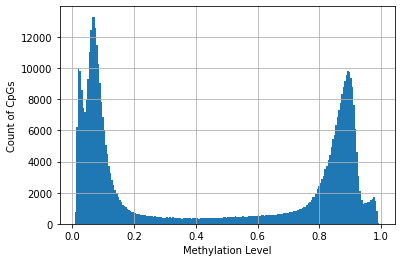

In [62]:
df=df[~df.Beta.isna()]
ax=df.Beta.hist(bins=200)
ax.set_xlabel("Methylation Level")
ax.set_ylabel("Count of CpGs")

In [35]:
#df=df[df.CHR<2]
df.shape

(473864, 37)

In [36]:
df['Forward_Sequence']=df.Forward_Sequence.str.replace("[",'').str.replace("]",'')
df['bases']=df.Forward_Sequence.apply(lambda x: ''.join(sorted(list(set(x)))))
df.bases.head(5)

Name
cg00000165    ACGT
cg00000363    ACGT
cg00000957    ACGT
cg00001349    ACGT
cg00001364    ACGT
Name: bases, dtype: object

In [37]:
df=df[df.bases=='ACGT'] # remove seqs with less or more than 4 bases
df.shape

(473850, 38)

In [58]:
sequences=df.Forward_Sequence
#sequences=df.seq.str.replace("N",'A')
sequences[0]

'CTAAGTGCAGTCAGGATCTGTTAGTACAGTGGCTTTTGATGGAACAGCTGAGGCACACATCGCCCGTGGCATGGACTCCGGGGCCGAACGCTCACGACCAAGACTTTTGCCCTTTTGAAATG'

In [59]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
integer_encoder = LabelEncoder()  
one_hot_encoder = OneHotEncoder(categories='auto')   
input_features = []

for sequence in sequences:
  integer_encoded = integer_encoder.fit_transform(list(sequence))
  integer_encoded = np.array(integer_encoded).reshape(-1, 1)
  one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded)
  input_features.append(one_hot_encoded.toarray())

np.set_printoptions(threshold=40)
input_features = np.stack(input_features)
print("Example sequence\n-----------------------")
print('DNA Sequence #1:\n',sequences[0][:10],'...',sequences[0][-10:])
print('One hot encoding of Sequence #1:\n',input_features[0].T)

Example sequence
-----------------------
DNA Sequence #1:
 CTAAGTGCAG ... TTTTGAAATG
One hot encoding of Sequence #1:
 [[0. 0. 1. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]]


In [40]:
labels = df.Beta

#labels = np.array(labels).reshape(-1, 1)
#input_labels = one_hot_encoder.fit_transform(labels).toarray()

input_labels=labels.values
print('Labels:\n',labels[0:5].T)
print('One-hot encoded labels:\n',input_labels[0:10].T)

Labels:
 Name
cg00000165    0.092336
cg00000363    0.092733
cg00000957    0.898857
cg00001349    0.218340
cg00001364    0.101081
Name: Beta, dtype: float64
One-hot encoded labels:
 [0.09233597 0.09273334 0.89885722 0.21834035 0.10108087 0.85421495
 0.75682651 0.0177566  0.93290334 0.0473946 ]


In [50]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(
    input_features, input_labels, test_size=0.5, random_state=1)
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=9, input_shape=(train_features.shape[1], 4)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, input_shape=(train_features.shape[1], 4)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=9, input_shape=(train_features.shape[1], 4)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(8, kernel_regularizer= regularizers.l1_l2(l1=1e-08, l2=5e-07), activation='relu'))
model.add(Dense(1))
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='mean_squared_error',optimizer=opt )
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_56 (Conv1D)           (None, 114, 32)           1184      
_________________________________________________________________
max_pooling1d_54 (MaxPooling (None, 57, 32)            0         
_________________________________________________________________
conv1d_57 (Conv1D)           (None, 55, 32)            3104      
_________________________________________________________________
max_pooling1d_55 (MaxPooling (None, 27, 32)            0         
_________________________________________________________________
conv1d_58 (Conv1D)           (None, 19, 32)            9248      
_________________________________________________________________
max_pooling1d_56 (MaxPooling (None, 9, 32)             0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 288)             

Epoch 1/50
1851/1851 [==============================] - 13s 7ms/step - loss: 0.1262 - val_loss: 0.1248
Epoch 2/50
1851/1851 [==============================] - 13s 7ms/step - loss: 0.1159 - val_loss: 0.1115
Epoch 3/50
1851/1851 [==============================] - 13s 7ms/step - loss: 0.1080 - val_loss: 0.1089
Epoch 4/50
1851/1851 [==============================] - 14s 7ms/step - loss: 0.1038 - val_loss: 0.1025
Epoch 5/50
1851/1851 [==============================] - 13s 7ms/step - loss: 0.1017 - val_loss: 0.1012
Epoch 6/50
1851/1851 [==============================] - 12s 7ms/step - loss: 0.1006 - val_loss: 0.1010
Epoch 7/50
1851/1851 [==============================] - 13s 7ms/step - loss: 0.0988 - val_loss: 0.1033
Epoch 8/50
1851/1851 [==============================] - 13s 7ms/step - loss: 0.0985 - val_loss: 0.0993
Epoch 9/50
1851/1851 [==============================] - 13s 7ms/step - loss: 0.0976 - val_loss: 0.0984
Epoch 10/50
1851/1851 [==============================] - 13s 7ms/step - l

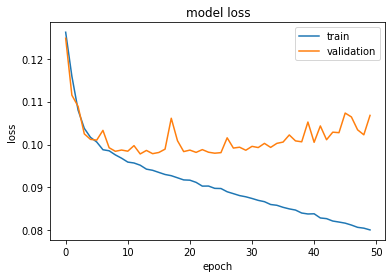

In [51]:
EPOCHS=50
history = model.fit(train_features, train_labels, epochs=EPOCHS, verbose=1, validation_split=0.75)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [54]:
test_labels=np.nan_to_num(test_labels)

Confusion matrix:
 [[102874  19976]
 [ 49764  64311]]


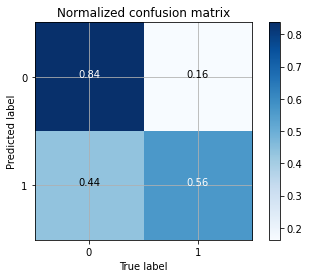

In [55]:
from sklearn.metrics import confusion_matrix
import itertools

predicted_labels = model.predict(np.stack(test_features))

cm = confusion_matrix(test_labels.round(), 
                      predicted_labels.round())
print('Confusion matrix:\n',cm)

cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Normalized confusion matrix')
plt.colorbar()
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.xticks([0, 1]); plt.yticks([0, 1])
plt.grid('off')
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment='center',
             color='white' if cm[i, j] > 0.5 else 'black')

In [ ]:
import tensorflow.keras.backend as K

def compute_salient_bases(model, x):
  input_tensors = [model.input]
  gradients = model.optimizer.get_gradients(model.output[0], model.input)
  compute_gradients = K.function(inputs = input_tensors, outputs = gradients)
  
  x_value = np.expand_dims(x, axis=0)
  gradients = compute_gradients([x_value])[0][0]
  sal = np.clip(np.sum(np.multiply(gradients,x), axis=1),a_min=0, a_max=None)
  return sal

In [ ]:
pd.DataFrame([range(20),predicted_labels[0:20],labels[0:20]])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,[0.22426307],[0.33573553],[0.5438651],[-0.03439638],[0.7087059],[0.6555698],[0.13520262],[0.3044556],[0.44698375],[0.57202834],[0.283885],[0.6921286],[0.8264035],[0.6842513],[0.28465807],[0.022031456],[0.58890456],[0.63251674],[0.14730735],[0.36831424]
2,0.092336,0.0927333,0.898857,0.21834,0.101081,0.854215,0.756827,0.0177566,0.932903,0.0473946,0.889877,0.895476,0.020561,0.156475,0.0991622,0.647515,0.929234,0.0186917,0.878837,0.846729


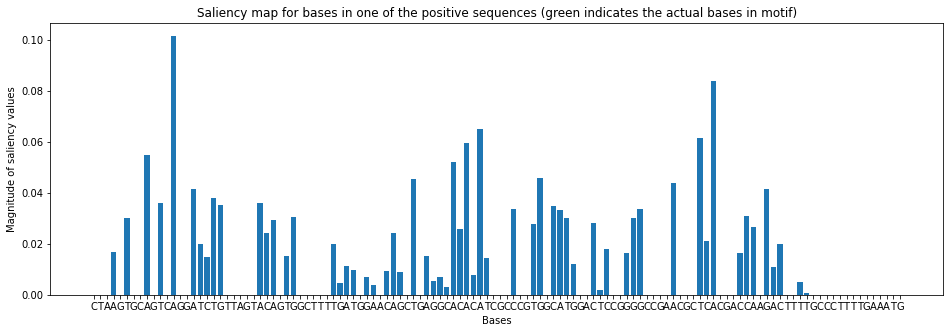

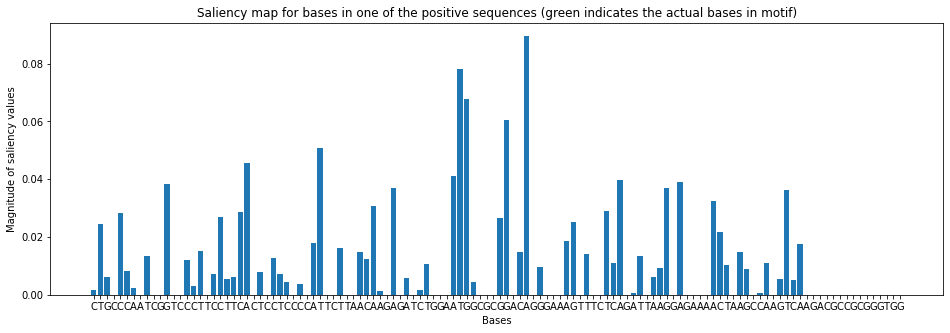

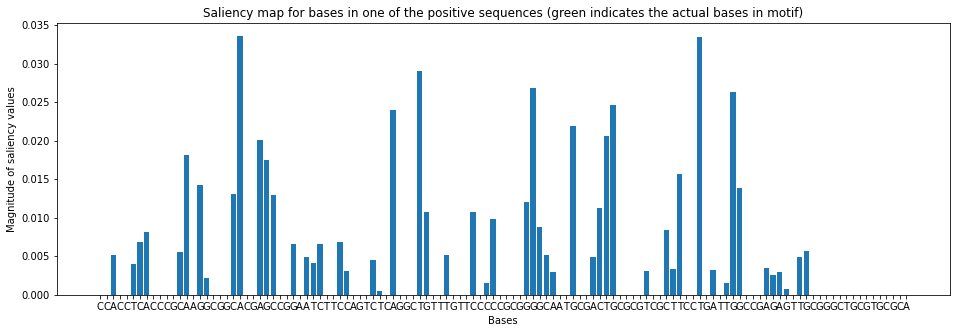

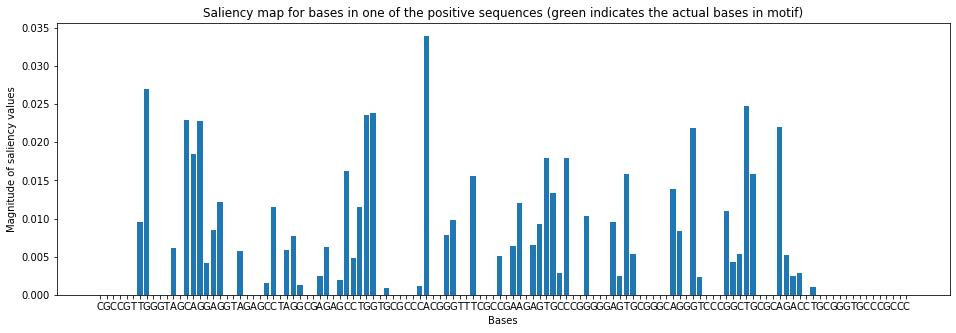

In [ ]:
for sequence_index in [0,1,3,7]:# 0  # You can change this to compute the gradient for a different example. But if so, change the coloring below as well.
  sal = compute_salient_bases(model, input_features[sequence_index])

  plt.figure(figsize=[16,5])
  barlist = plt.bar(np.arange(len(sal)), sal)
  #[barlist[i].set_color('C1') for i in range(5,17)]  # Change the coloring here if you change the sequence index.
  plt.xlabel('Bases')
  plt.ylabel('Magnitude of saliency values')
  plt.xticks(np.arange(len(sal)), list(sequences[sequence_index]));
  plt.title('Saliency map for bases in one of the positive sequences'
            ' (green indicates the actual bases in motif)');

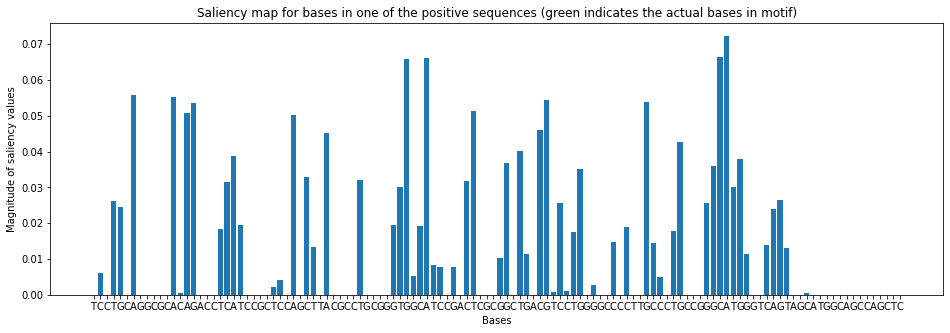

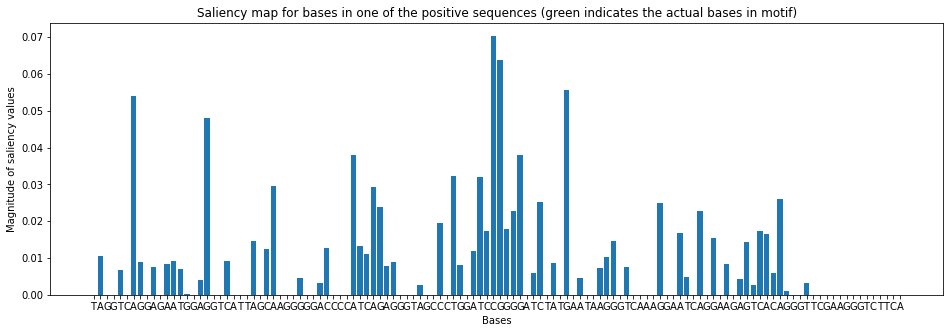

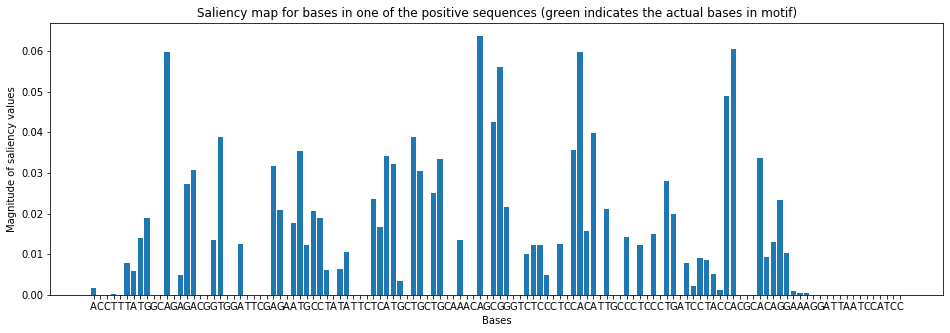

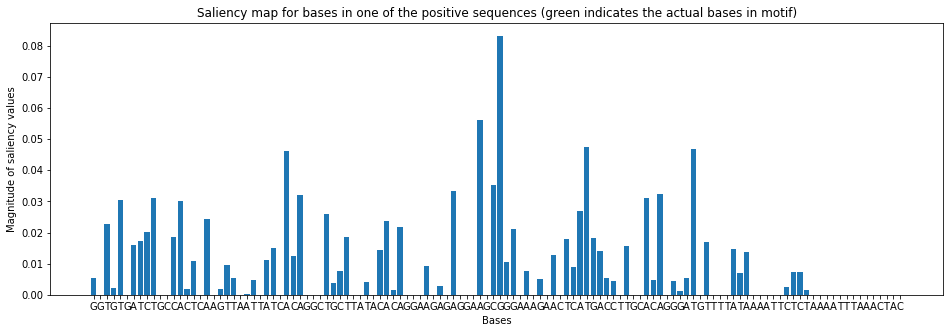

In [ ]:
for sequence_index in [2,5,11,16]:# 1  
  sal = compute_salient_bases(model, input_features[sequence_index])

  plt.figure(figsize=[16,5])
  barlist = plt.bar(np.arange(len(sal)), sal)
  #[barlist[i].set_color('C1') for i in range(5,17)]  # Change the coloring here if you change the sequence index.
  plt.xlabel('Bases')
  plt.ylabel('Magnitude of saliency values')
  plt.xticks(np.arange(len(sal)), list(sequences[sequence_index]));
  plt.title('Saliency map for bases in one of the positive sequences'
            ' (green indicates the actual bases in motif)');

In [ ]:
motif=df[df.Forward_Sequence.str.contains('CCCCGCCCC')]
motif=motif[motif.Beta>.95]
motif.shape

(25, 38)

In [ ]:
sequences=motif.Forward_Sequence
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
integer_encoder = LabelEncoder()  
one_hot_encoder = OneHotEncoder(categories='auto')   
input_features = []

for sequence in sequences:
  integer_encoded = integer_encoder.fit_transform(list(sequence))
  integer_encoded = np.array(integer_encoded).reshape(-1, 1)
  one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded)
  input_features.append(one_hot_encoded.toarray())

np.set_printoptions(threshold=40)
input_features = np.stack(input_features)
print("Example sequence\n-----------------------")
print('DNA Sequence #1:\n',sequences[0][:10],'...',sequences[0][-10:])
print('One hot encoding of Sequence #1:\n',input_features[0].T)

Example sequence
-----------------------
DNA Sequence #1:
 TGCGGATCCC ... TGAGACATCA
One hot encoding of Sequence #1:
 [[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]]


In [ ]:
input_features.shape

(25, 122, 4)

In [ ]:
model.predict(np.stack(input_features))

array([[0.41176736],
       [0.4139527 ],
       [0.31437826],
       [0.18667579],
       [0.14511588],
       [0.49790362],
       [0.31220332],
       [0.6724862 ],
       [0.15722649],
       [0.46765378],
       [0.2587865 ],
       [0.6950834 ],
       [0.14824833],
       [0.24245808],
       [0.09924337],
       [0.17758502],
       [0.21263063],
       [0.4144423 ],
       [0.43975282],
       [0.1862517 ],
       [0.20655945],
       [0.4169432 ],
       [0.14474797],
       [0.554237  ],
       [0.7249212 ]], dtype=float32)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


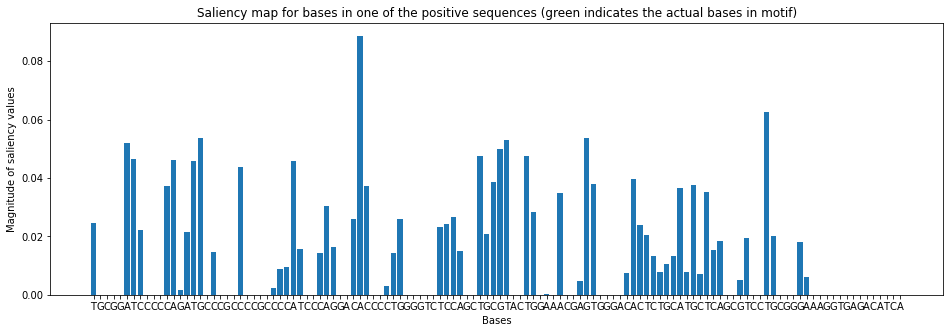

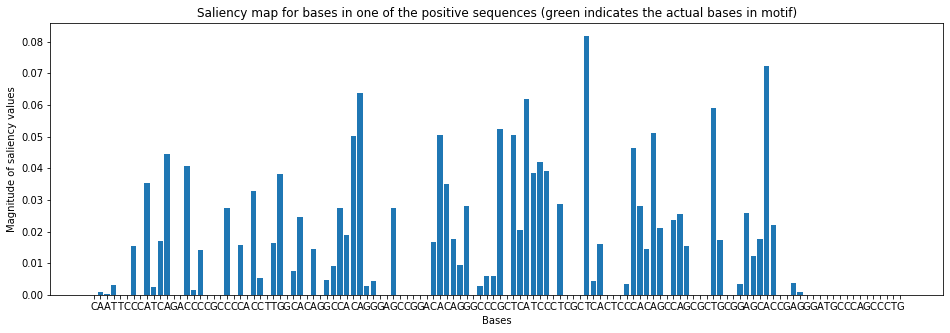

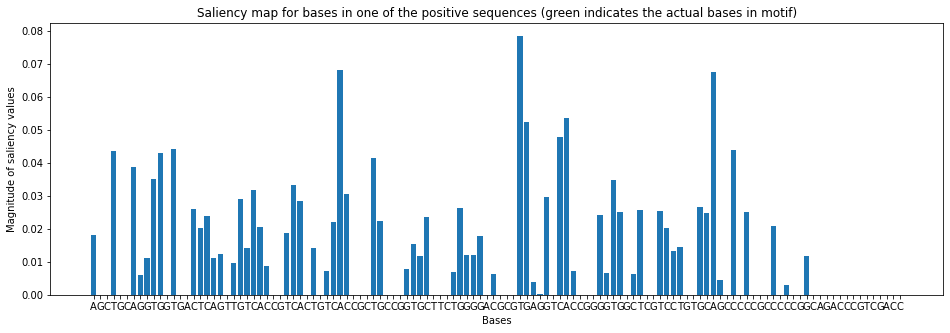

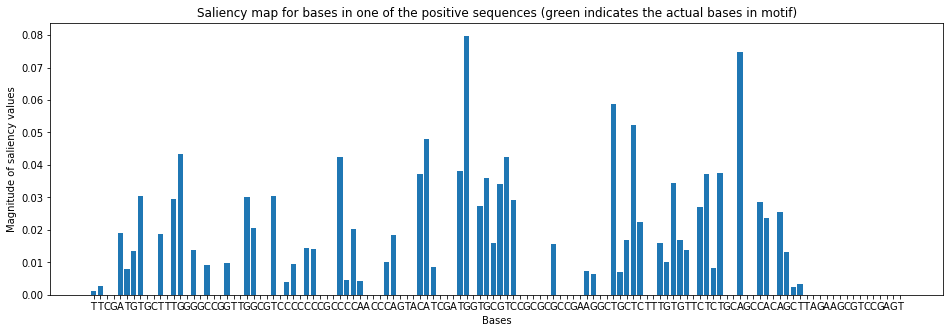

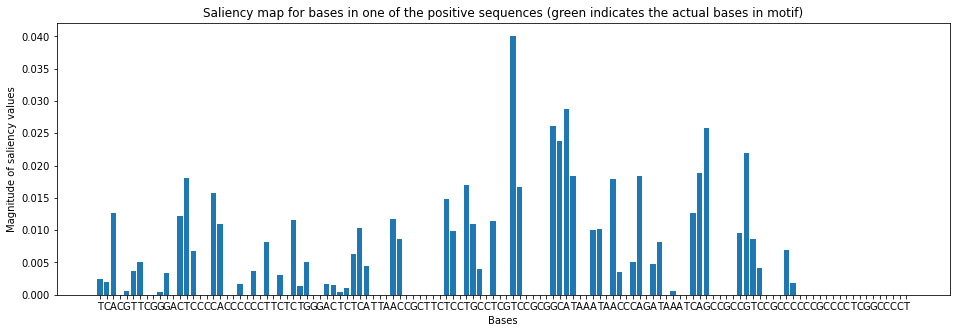

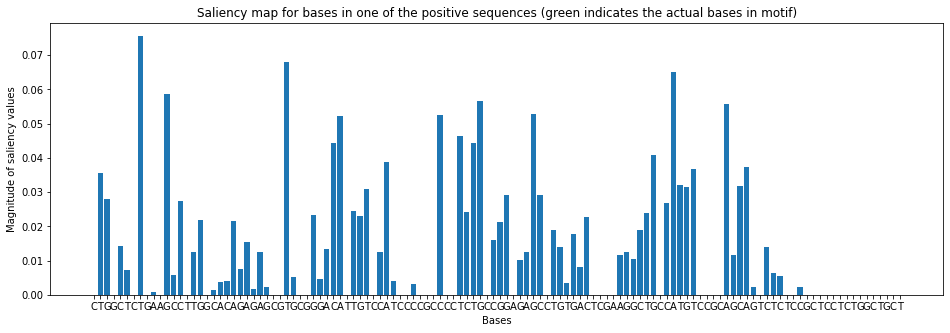

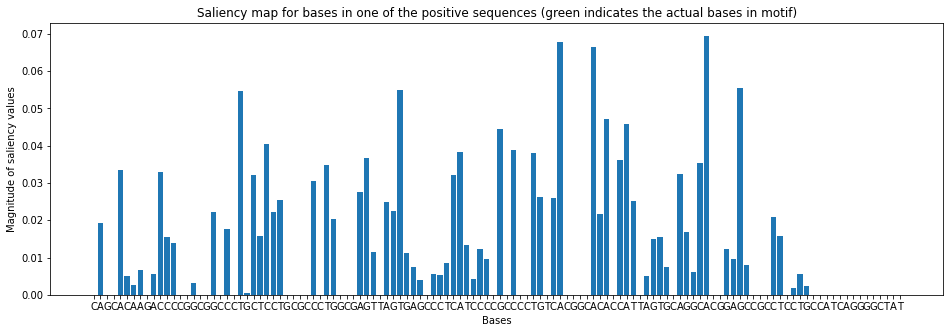

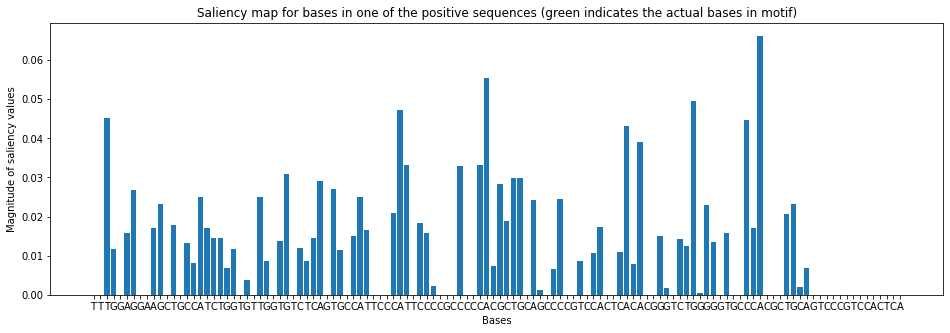

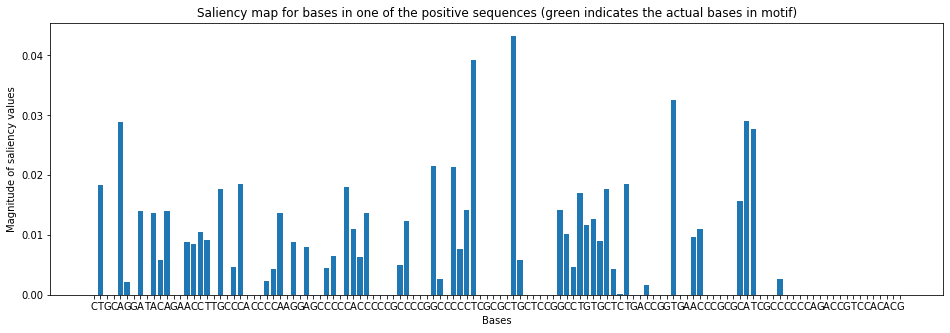

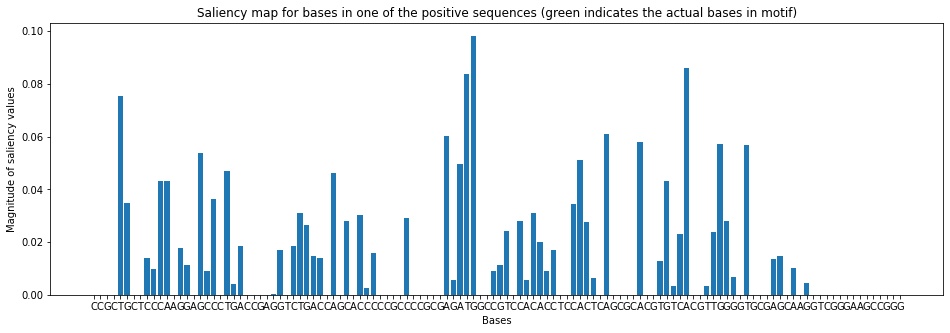

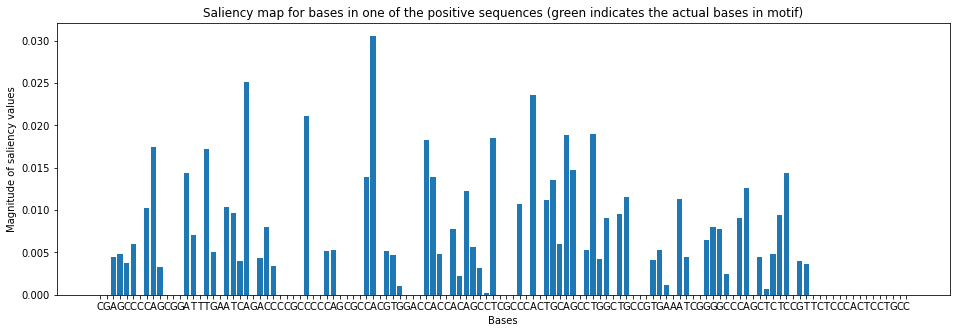

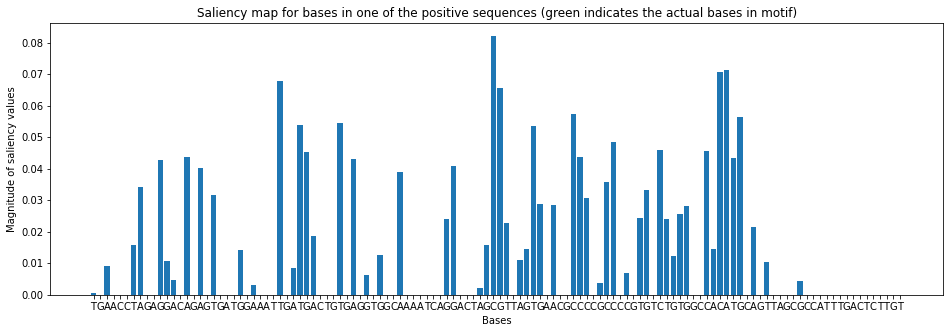

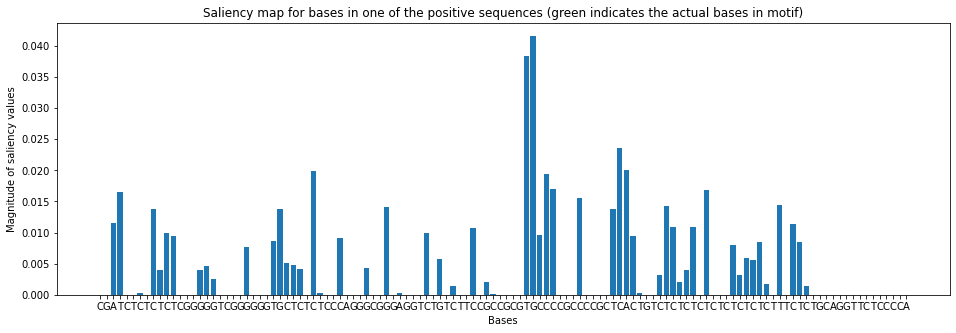

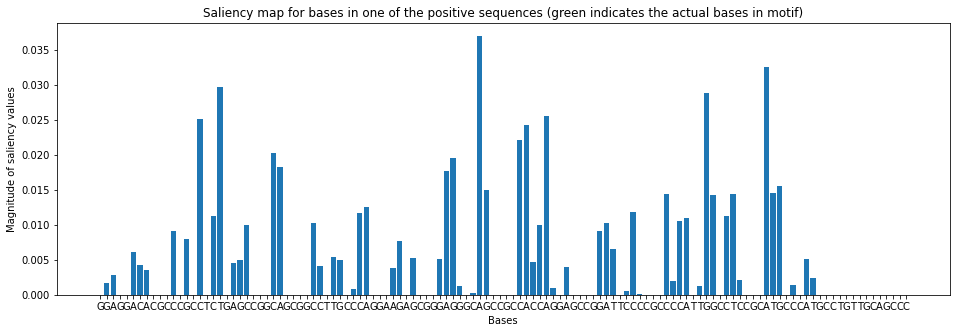

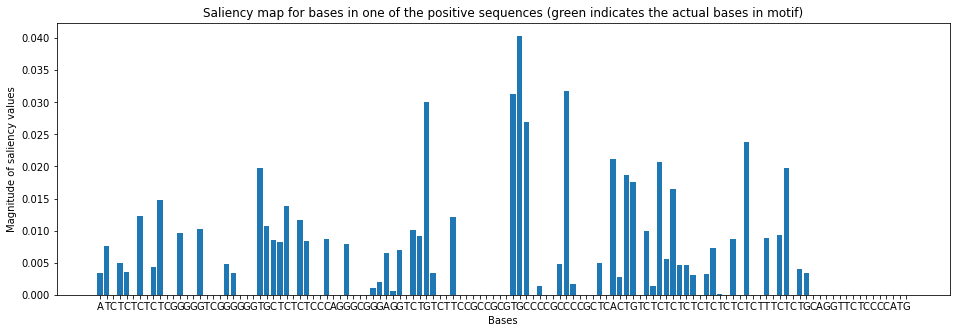

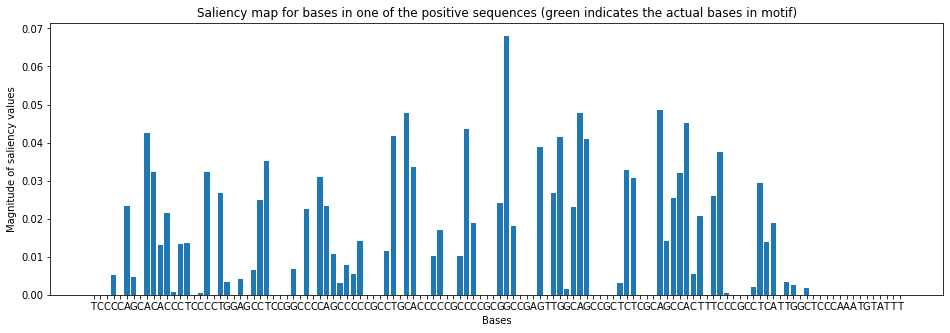

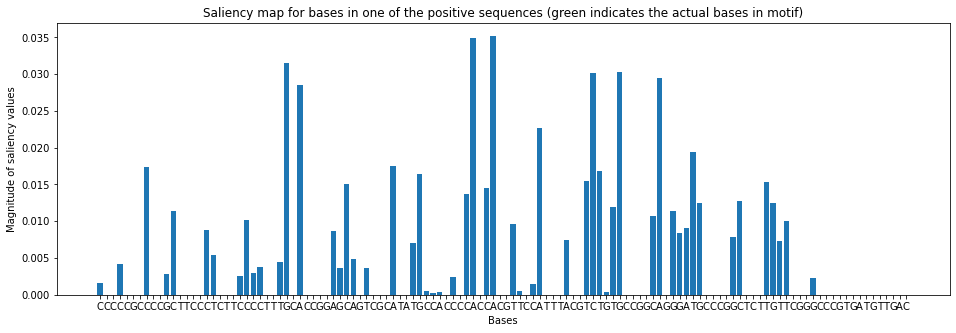

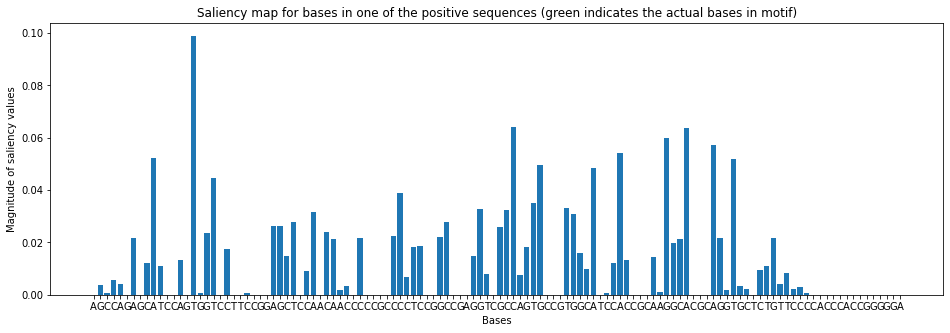

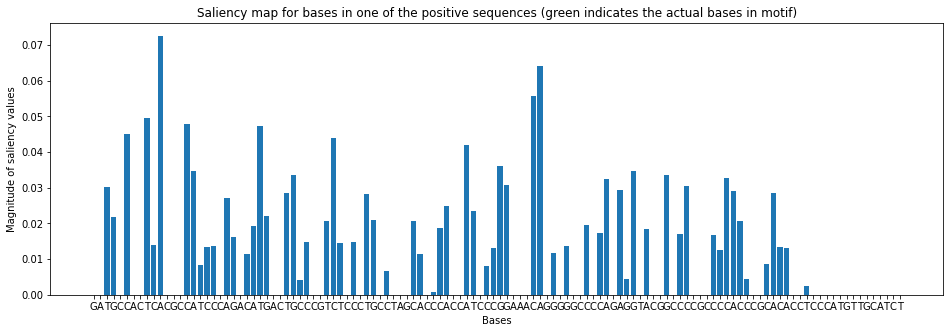

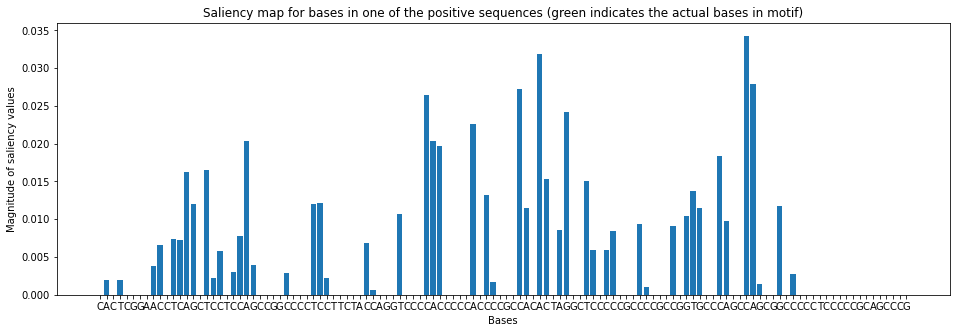

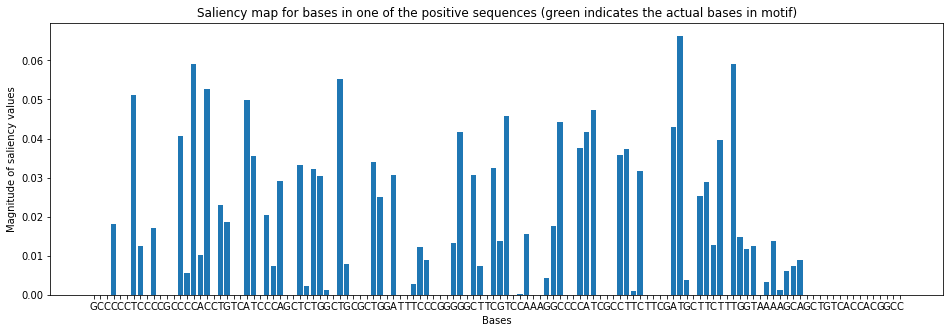

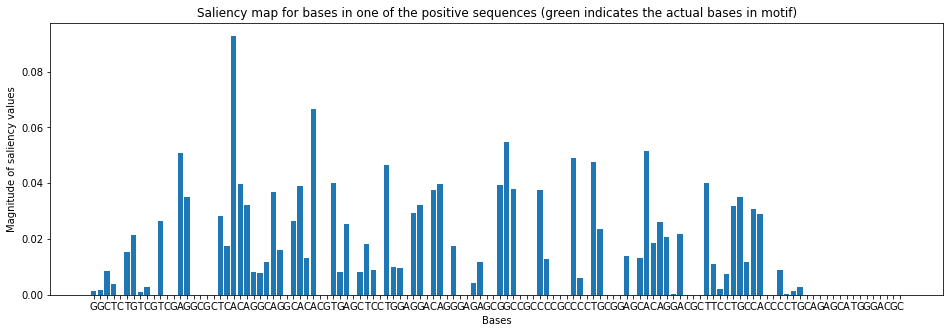

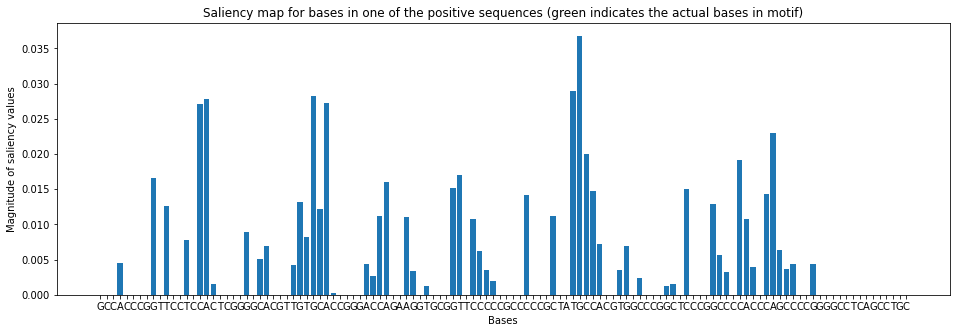

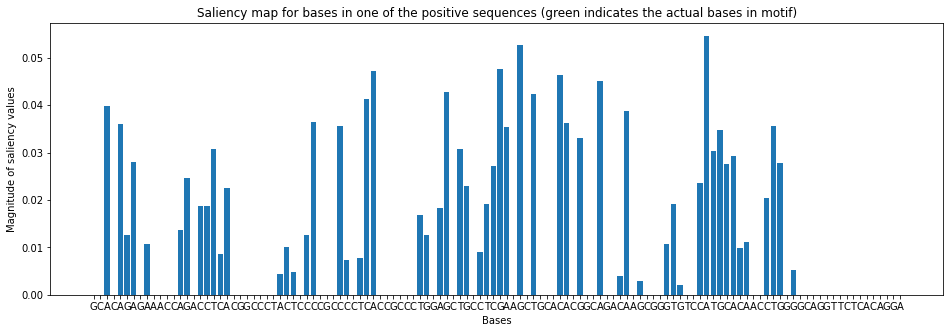

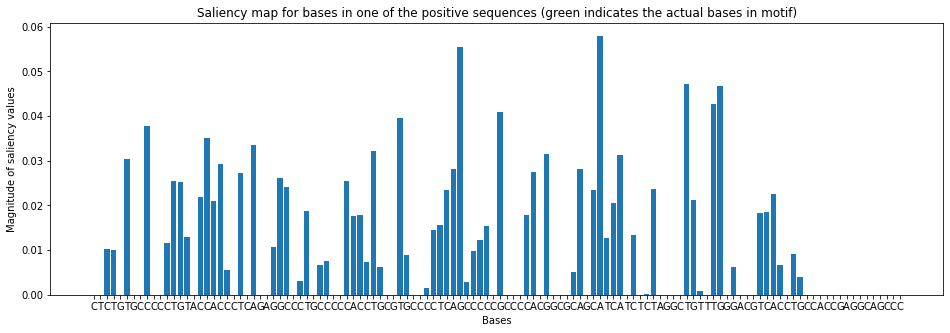

In [ ]:
for sequence_index in range(len(input_features)):# 0  # You can change this to compute the gradient for a different example. But if so, change the coloring below as well.
  sal = compute_salient_bases(model, input_features[sequence_index])

  plt.figure(figsize=[16,5])
  barlist = plt.bar(np.arange(len(sal)), sal)
  #[barlist[i].set_color('C1') for i in range(5,17)]  # Change the coloring here if you change the sequence index.
  plt.xlabel('Bases')
  plt.ylabel('Magnitude of saliency values')
  plt.xticks(np.arange(len(sal)), list(sequences[sequence_index]));
  plt.title('Saliency map for bases in one of the positive sequences'
            ' (green indicates the actual bases in motif)');